#### 1.Load the required Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
plt.rcParams['figure.figsize'] = [15,8]

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


#### 2.Data Preparation

In [2]:
# load the csv file
# store the data in 'df_admissions'
df_train = pd.read_csv('train.csv')



In [3]:
# display first five train observations using head()
df_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.626700,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,39833.921000,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.691050,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.575900,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.825450,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
#remove the insignificant features.
df_train=df_train.drop(['ID'],axis=1)

In [5]:
#object data-types
df_object=df_train.select_dtypes(exclude=np.number)
df_object.head()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL


In [6]:
#numerical data-type
df_num=df_train.select_dtypes(include=np.number)
df_num.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,11.135007,176346.626700,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,3609,11940,12191.996920,59,12.237563,39833.921000,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,28276,9311,21603.224550,59,12.545884,91506.691050,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,11170,6954,17877.155850,59,16.731201,108286.575900,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,16890,13226,13539.926670,59,15.008300,44234.825450,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0


In [7]:
#lets find the shape
df_train.shape

(67463, 34)

In [8]:
#there are 67463 rows and 35 rows in the dataset.

In [9]:
#find the info from the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Batch Enrolled                67463 non-null  object 
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Employment Duration           67463 non-null  object 
 9   Home Ownership                67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Payment Plan                  67463 non-null  object 
 12  Loan Title                    67463 non-null  object 
 13  D

In [10]:
#in this we have 9-float,16-int,9-object present in our data all the features are non-null values.

In [11]:
#statistical view.
df_train.describe() #numerical data-types

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,0.000000,146.467990,159573.933638,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,0.000000,744.382233,139033.245565,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.000000,1.000000,617.000000,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.000000,24.000000,50379.000000,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.000000,36.000000,118369.000000,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,0.000000,46.000000,228375.000000,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.000000,16421.000000,1177412.000000,201169.000000,1.000000


In [12]:
df_train.describe(include=object) #non-numerical 

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


In [13]:
#find the duplicates values
df_train.duplicated().sum() #we have 0 values of duplicates

0

In [14]:
#lets check once null values.
df_train.isnull().sum()/len(df_train)*100

Loan Amount                    0.000000
Funded Amount                  0.000000
Funded Amount Investor         0.000000
Term                           0.000000
Batch Enrolled                 0.000000
Interest Rate                  0.000000
Grade                          0.000000
Sub Grade                      0.000000
Employment Duration            0.000000
Home Ownership                 0.000000
Verification Status            0.000000
Payment Plan                   0.000000
Loan Title                     0.000000
Debit to Income                0.000000
Delinquency - two years        0.000000
Inquires - six months          0.000000
Open Account                   0.000000
Public Record                  0.000000
Revolving Balance              0.000000
Revolving Utilities            0.000000
Total Accounts                 0.000000
Initial List Status            0.000000
Total Received Interest        0.000000
Total Received Late Fee        0.000000
Recoveries                     0.000000


In [15]:
#we do not have any null values present in our dataset.

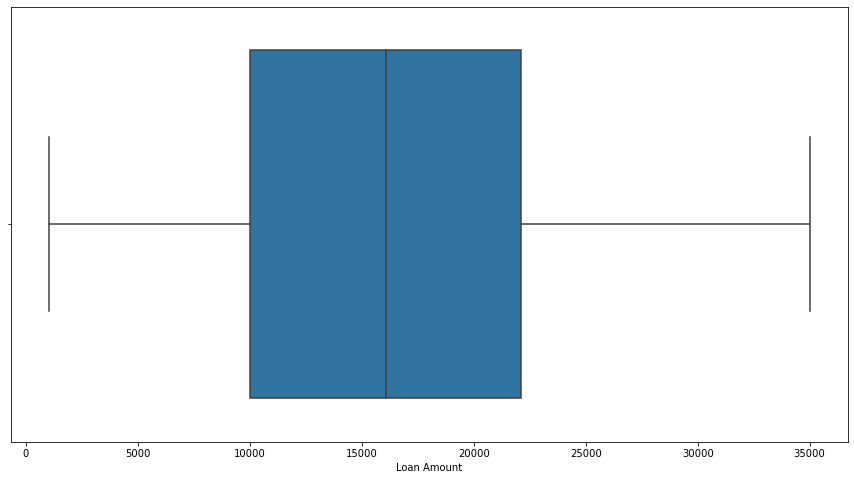

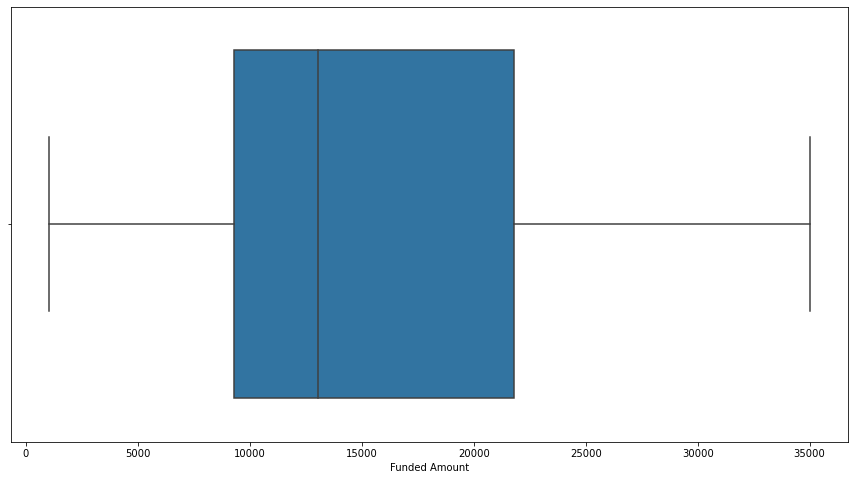

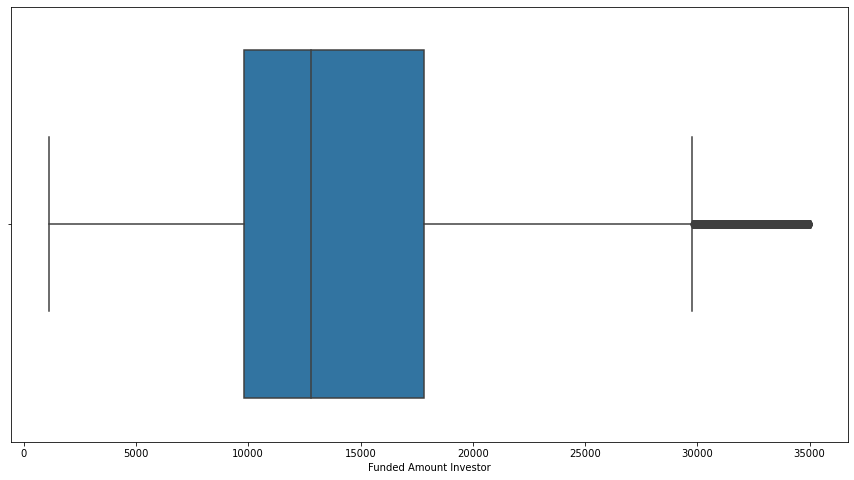

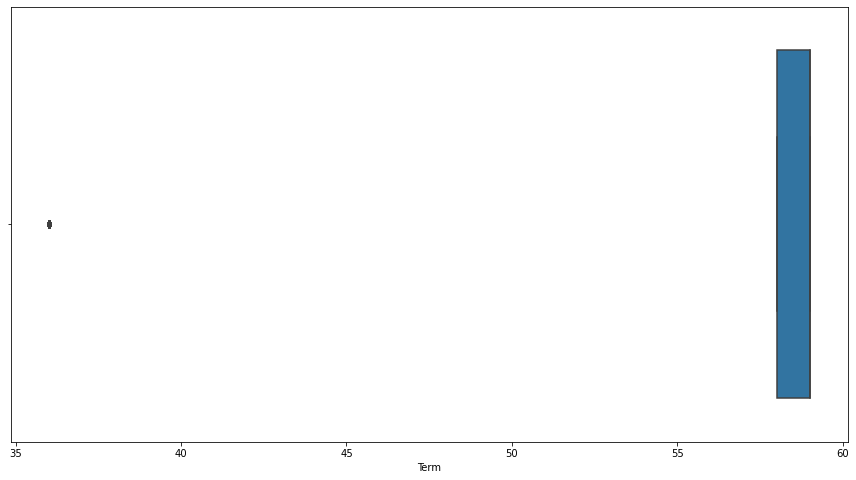

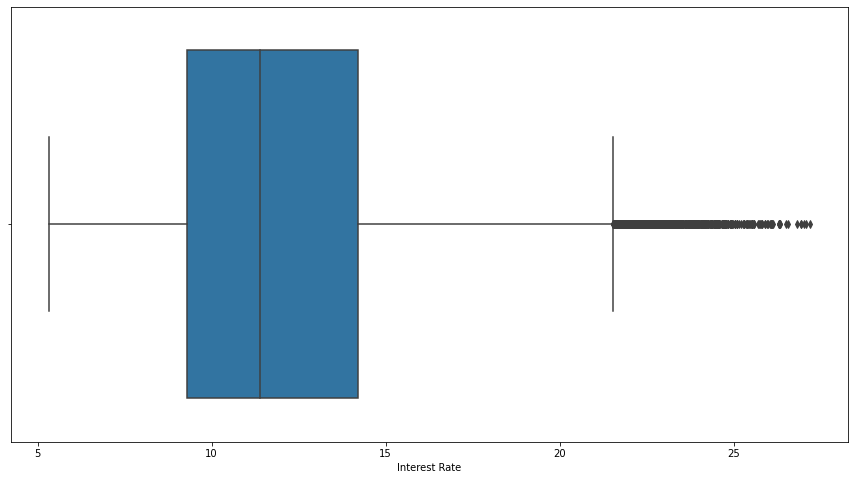

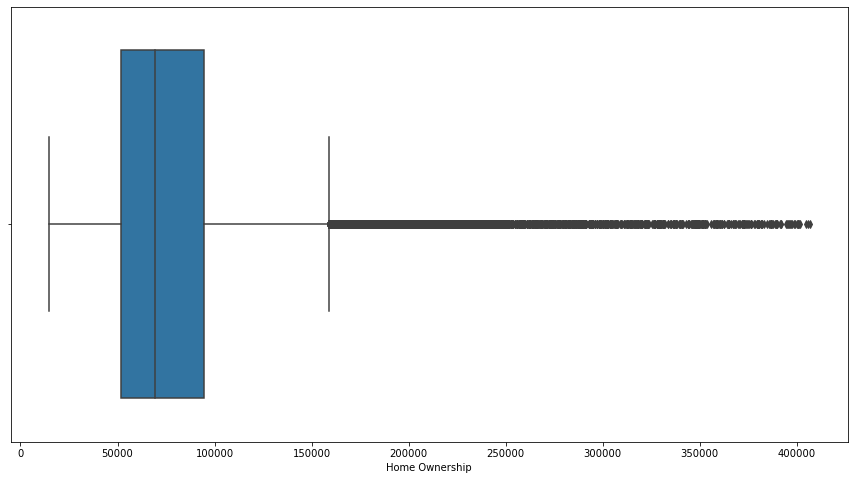

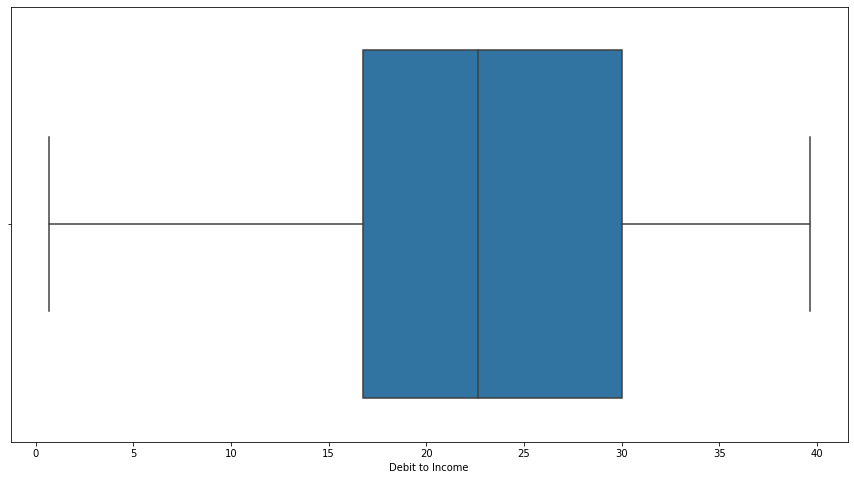

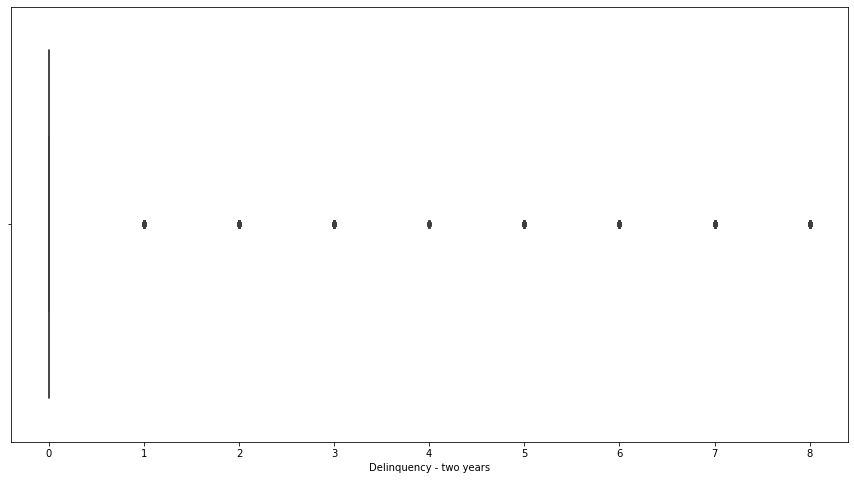

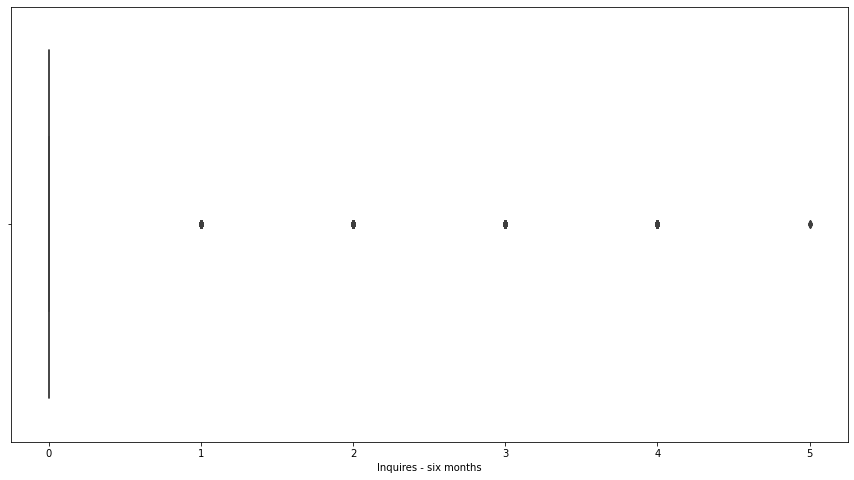

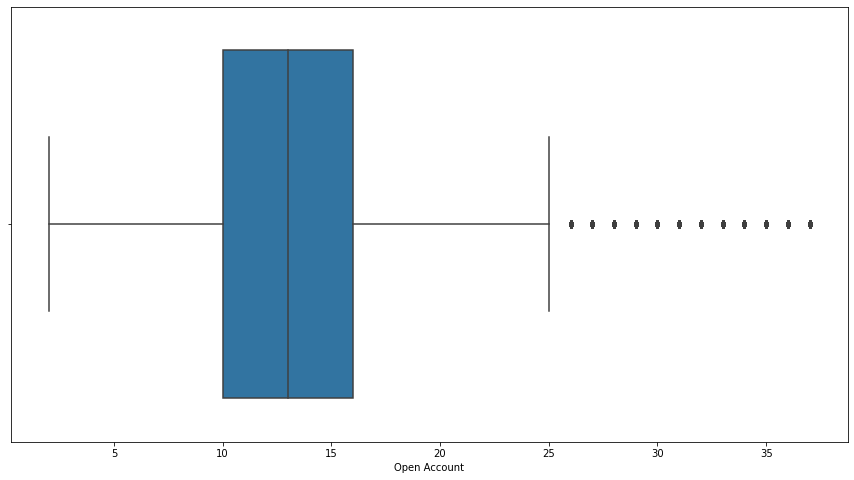

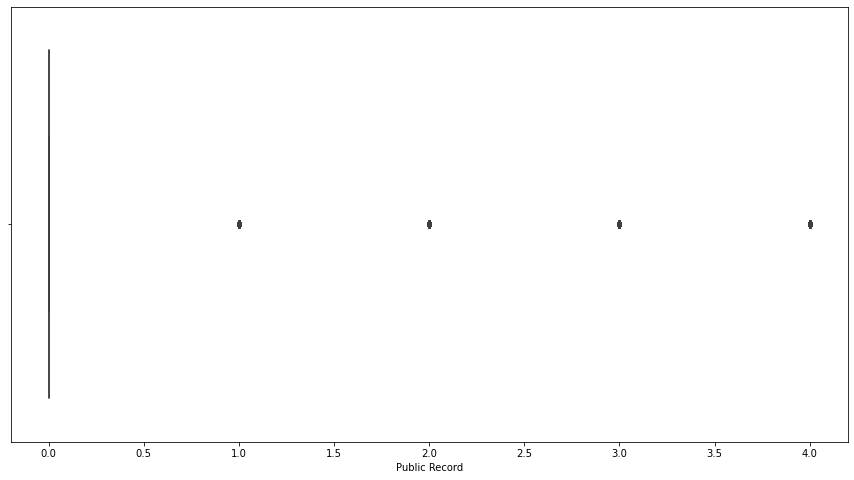

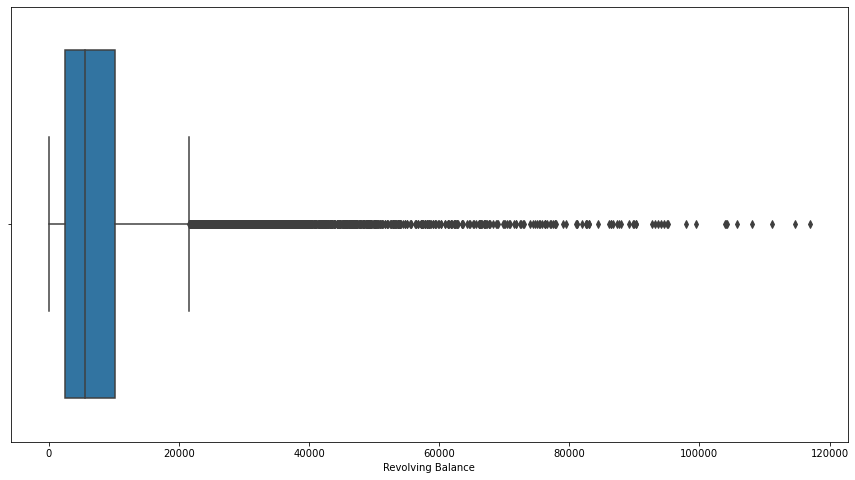

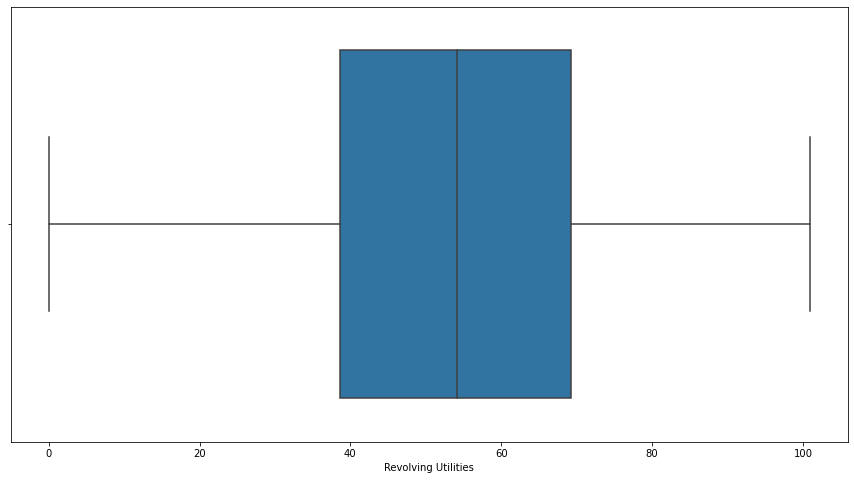

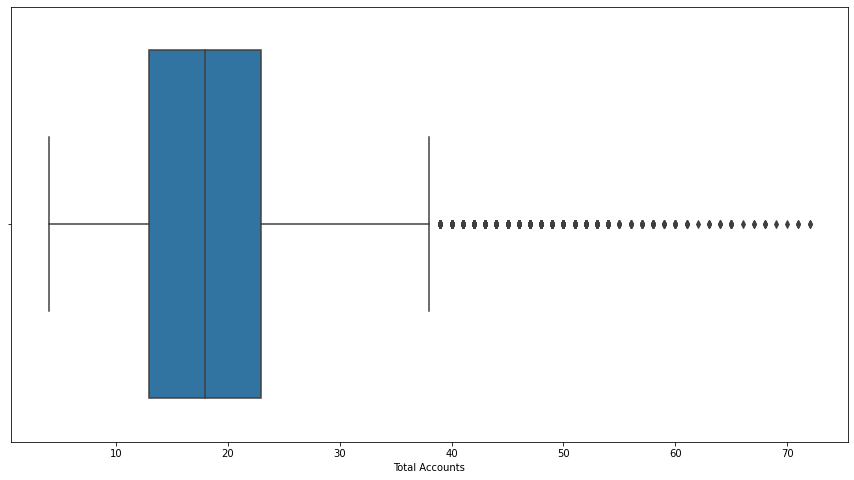

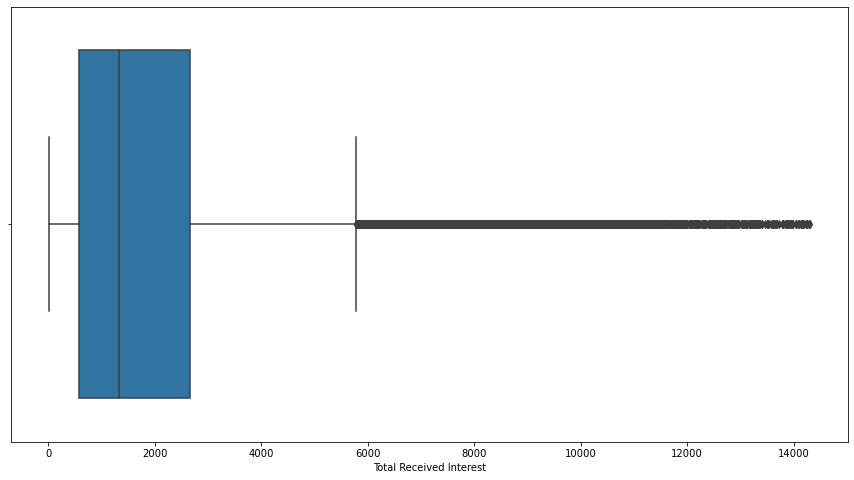

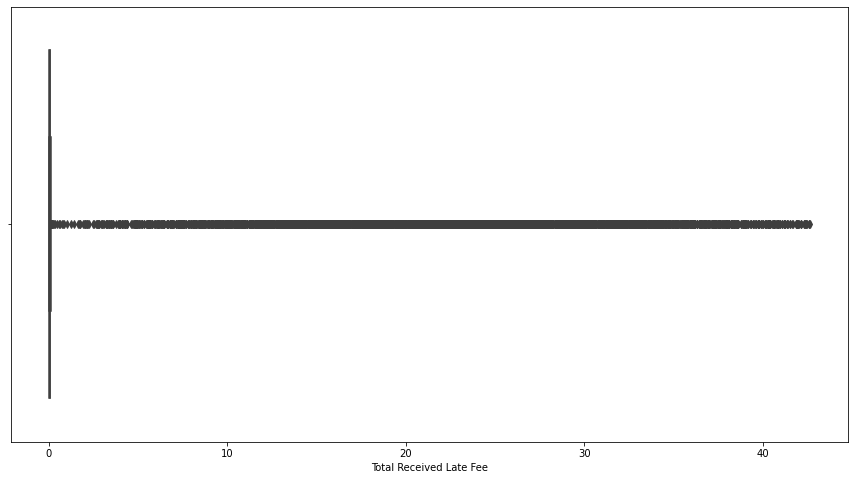

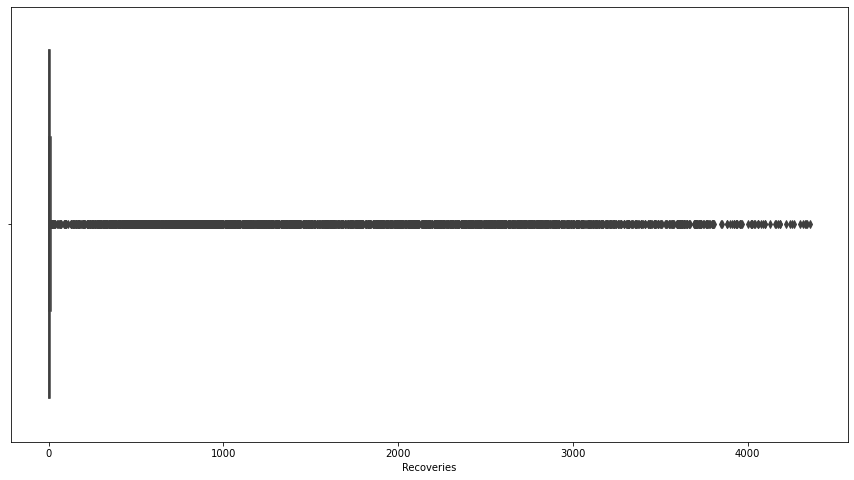

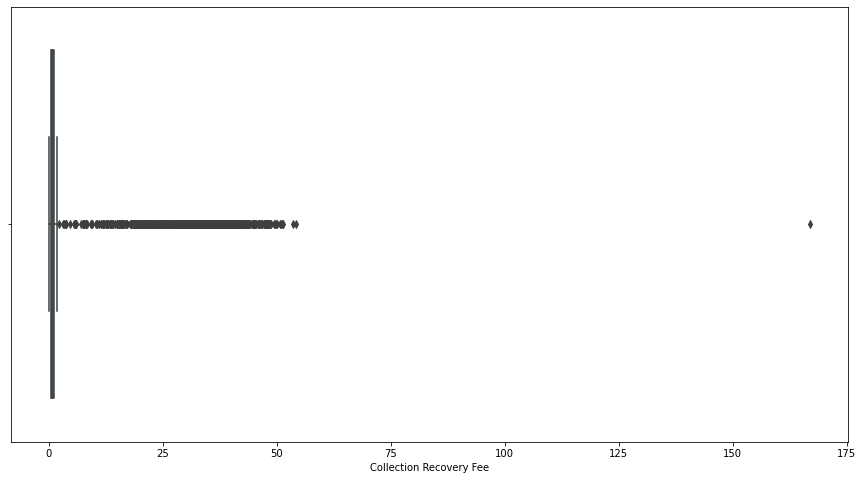

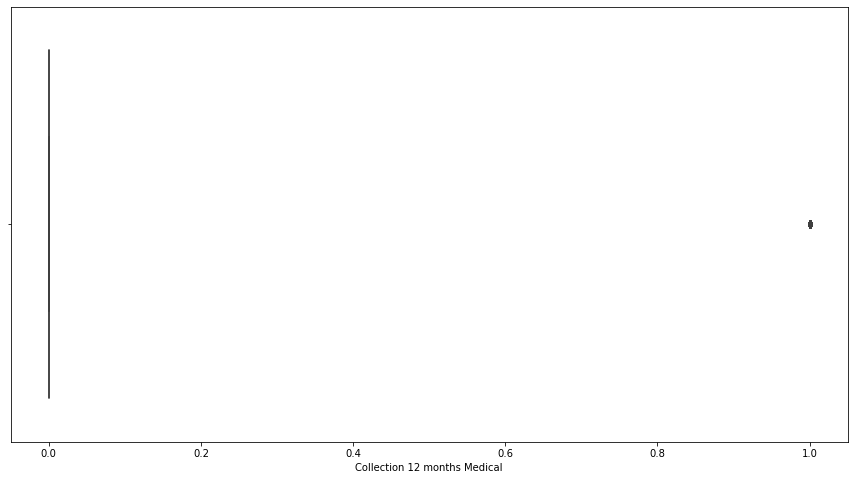

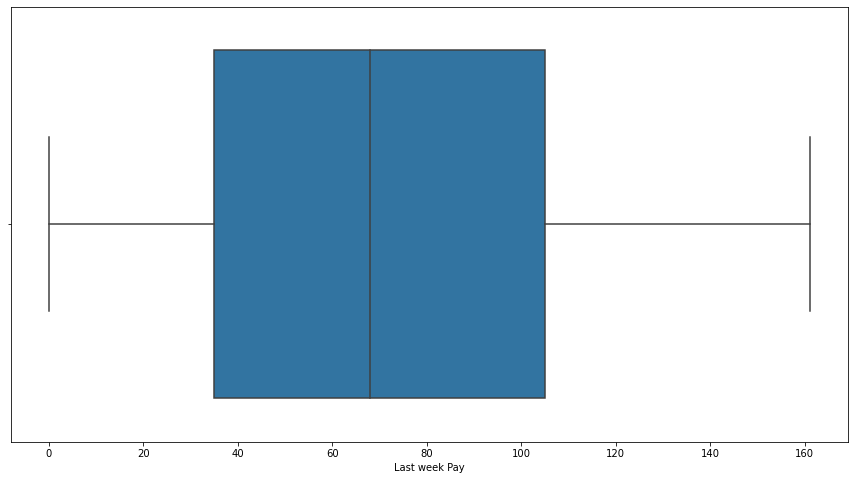

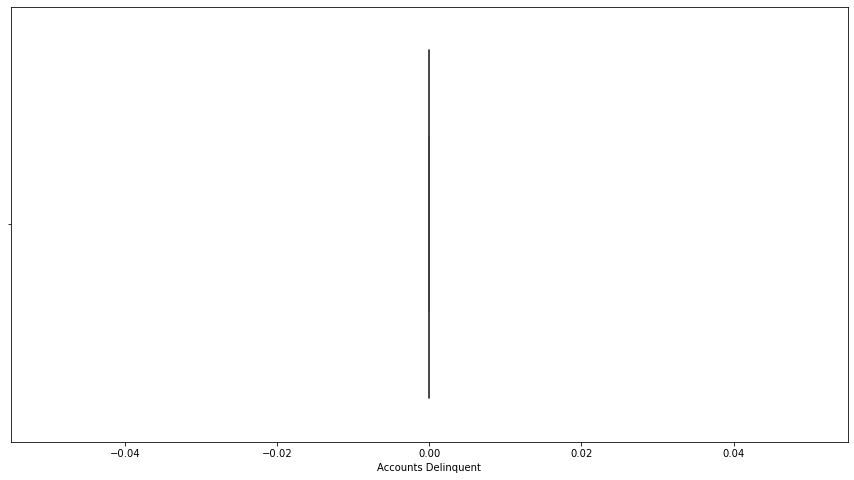

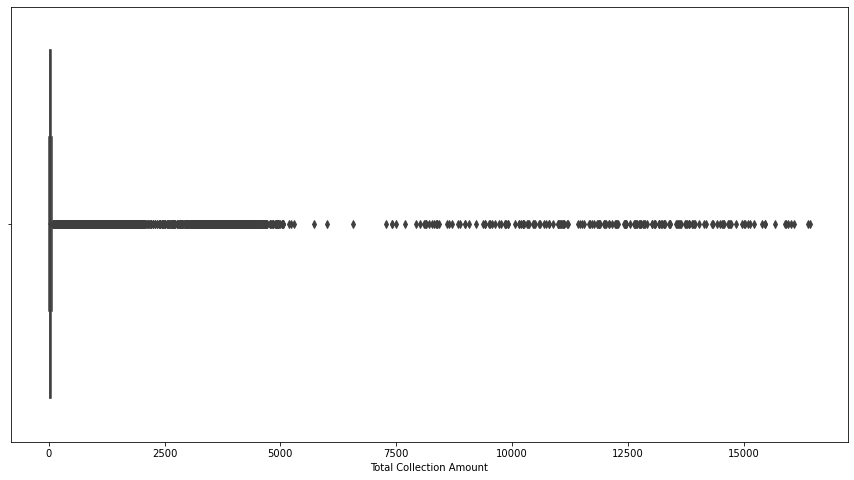

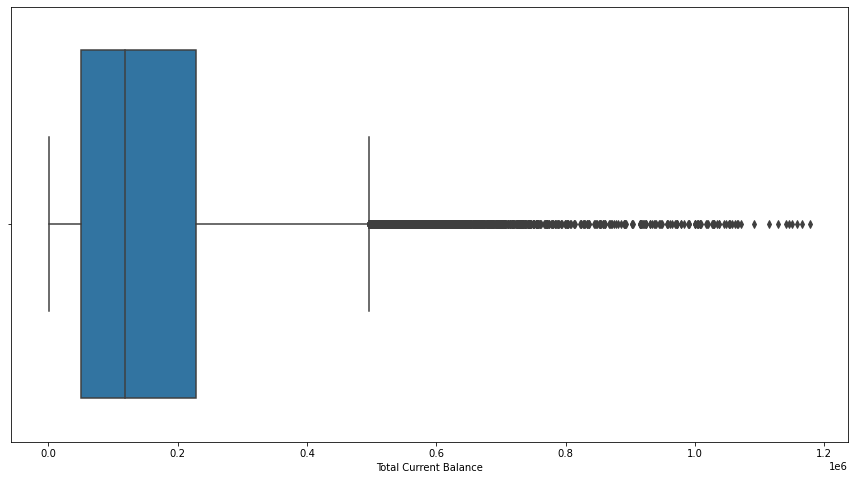

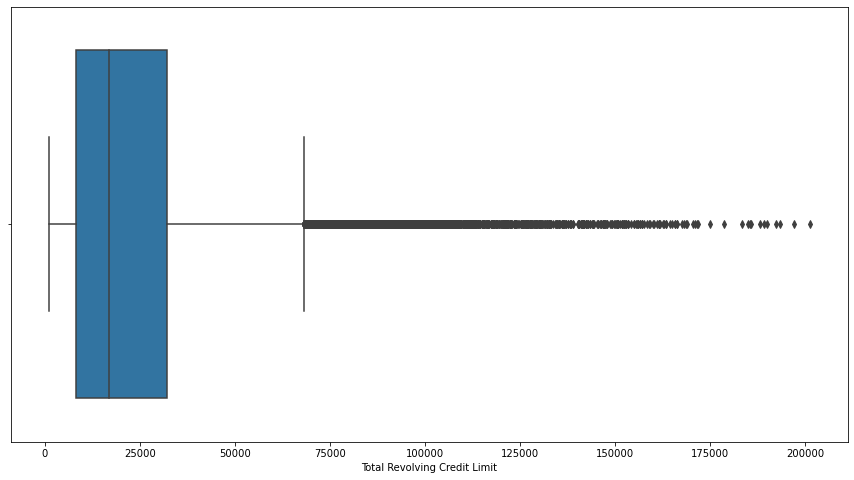

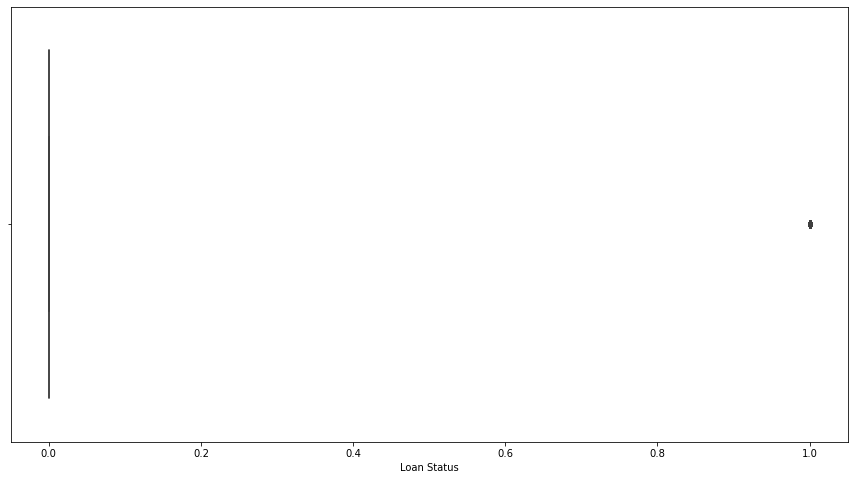

In [16]:
#check the outliers
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [17]:
#funded amount investor,interest rate,home ownership,revolving balance,total received interest,total received late fee,
#recoveries,collection recovery fee,total collection amount,total current balance ,total revolving credit limit

#### 3.Univarites

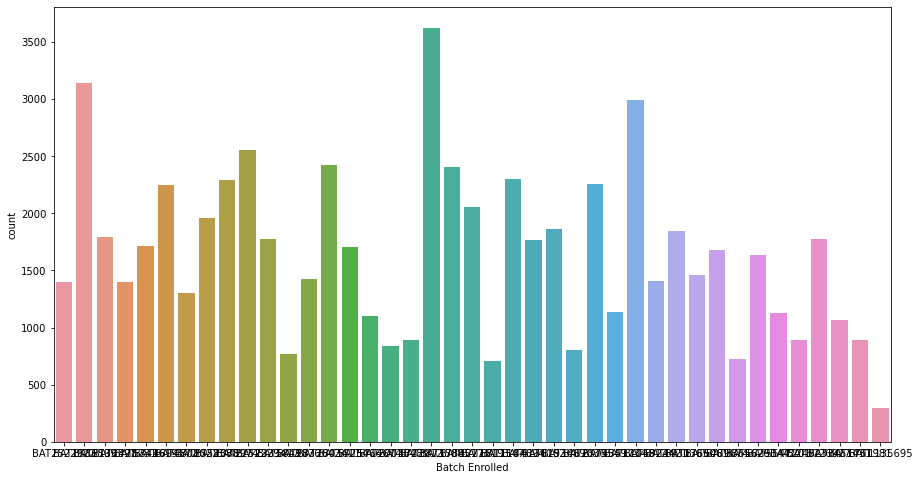

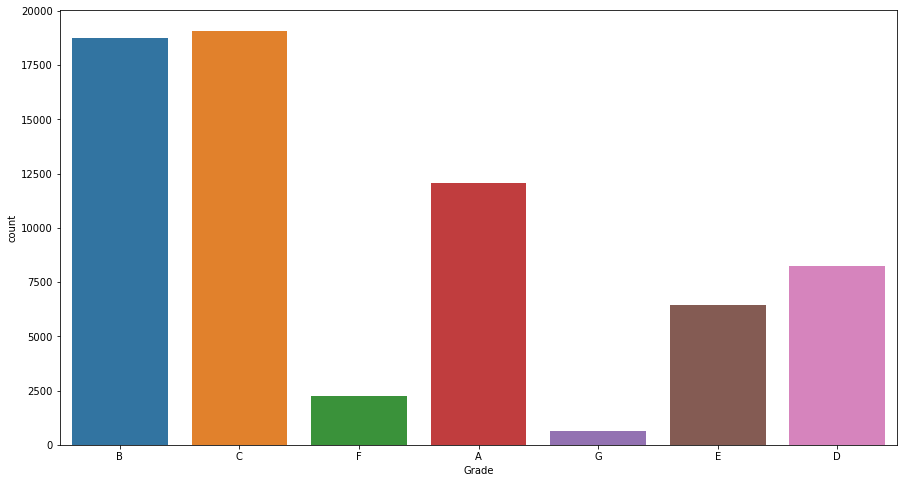

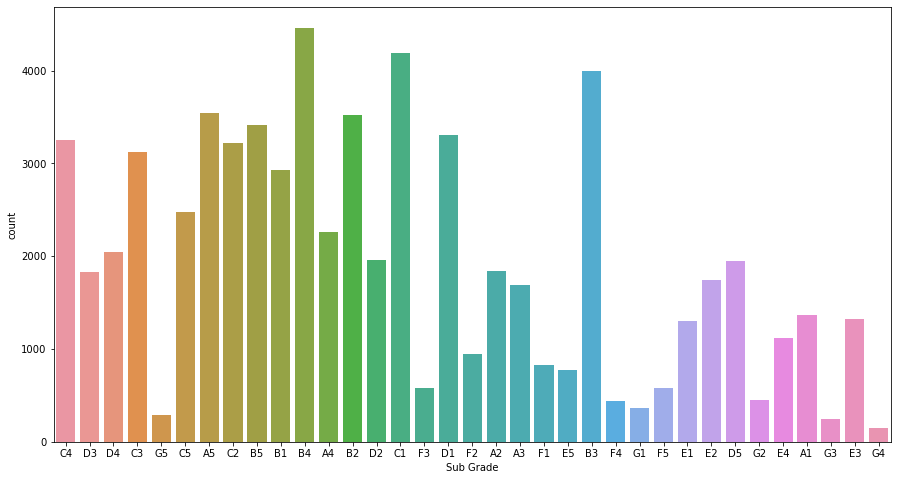

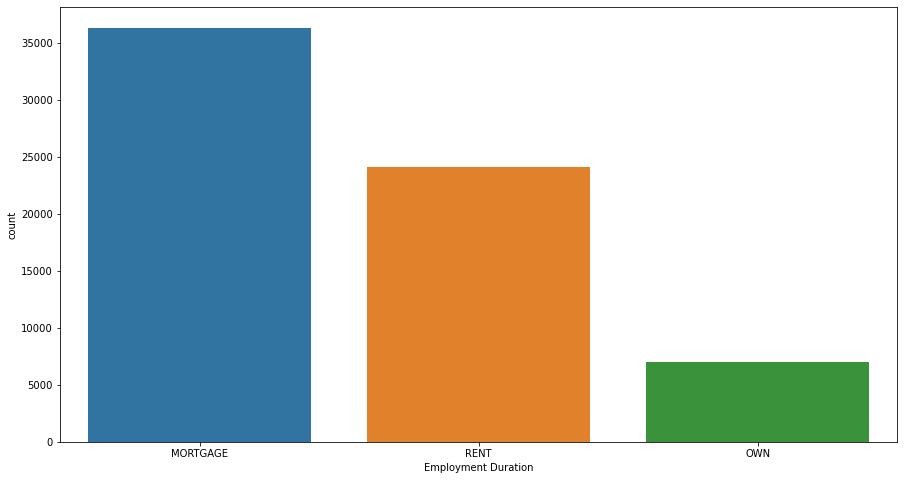

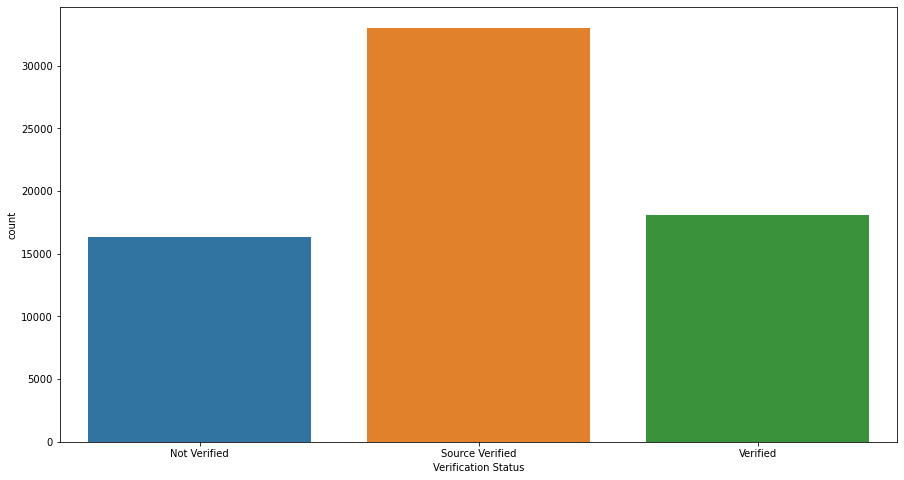

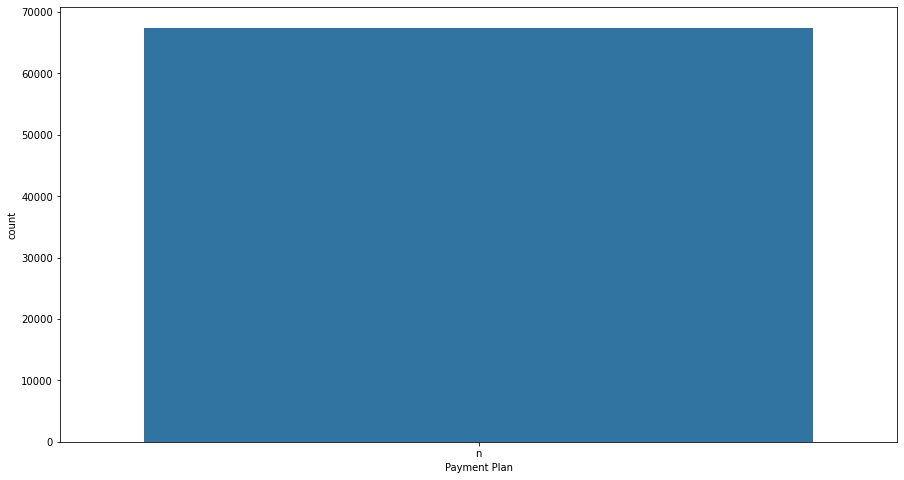

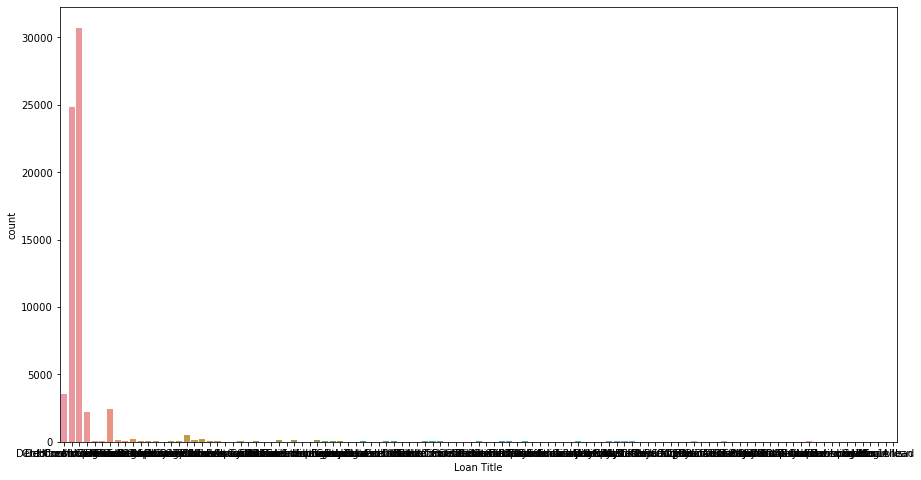

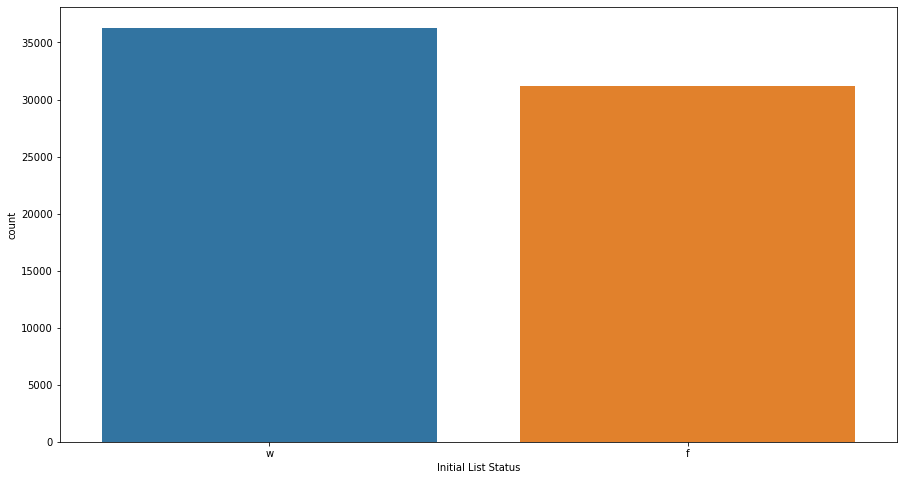

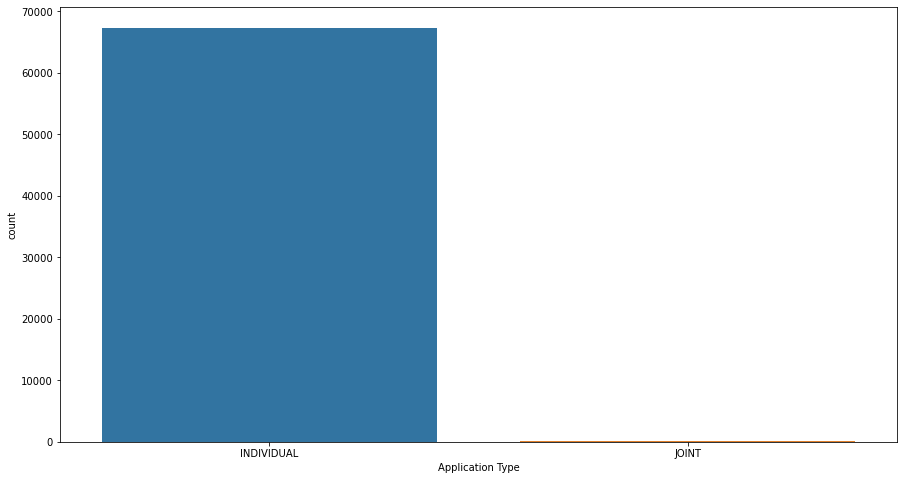

In [18]:
for i in df_object.columns:
    sns.countplot(df_object[i])
    plt.show()

In [19]:
#our traget variable is imbalanced
df_train['Loan Status'].value_counts(normalize=True)*100

0   90.749003
1    9.250997
Name: Loan Status, dtype: float64

<AxesSubplot:>

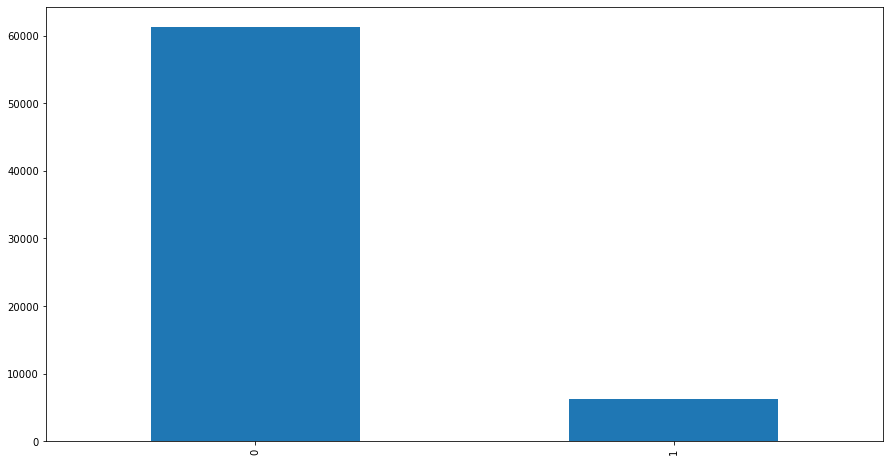

In [20]:
df_train['Loan Status'].value_counts().plot(kind='bar')

In [21]:
#data is imbalanced.

#### Bivarites

<AxesSubplot:xlabel='Application Type'>

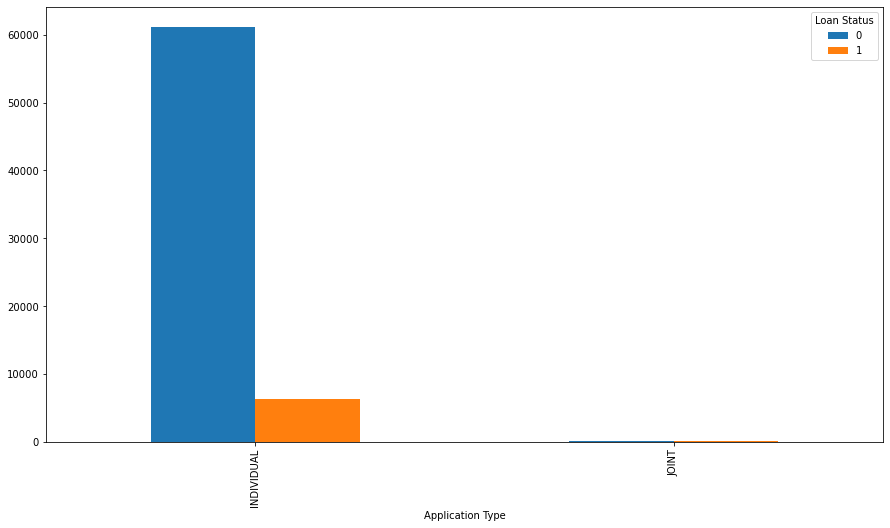

In [22]:
pd.crosstab(df_train['Application Type'],df_train['Loan Status']).plot(kind='bar')

<AxesSubplot:xlabel='Initial List Status'>

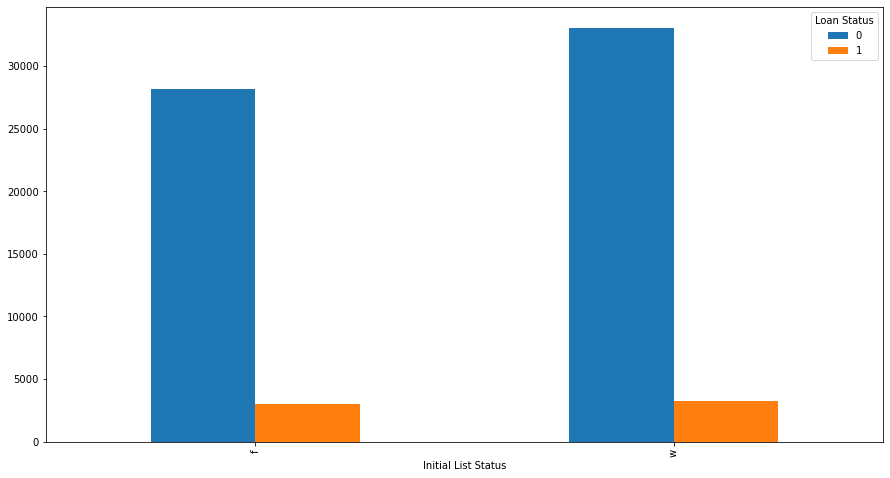

In [23]:
pd.crosstab(df_train['Initial List Status'],df_train['Loan Status']).plot(kind='bar')

<AxesSubplot:xlabel='Employment Duration'>

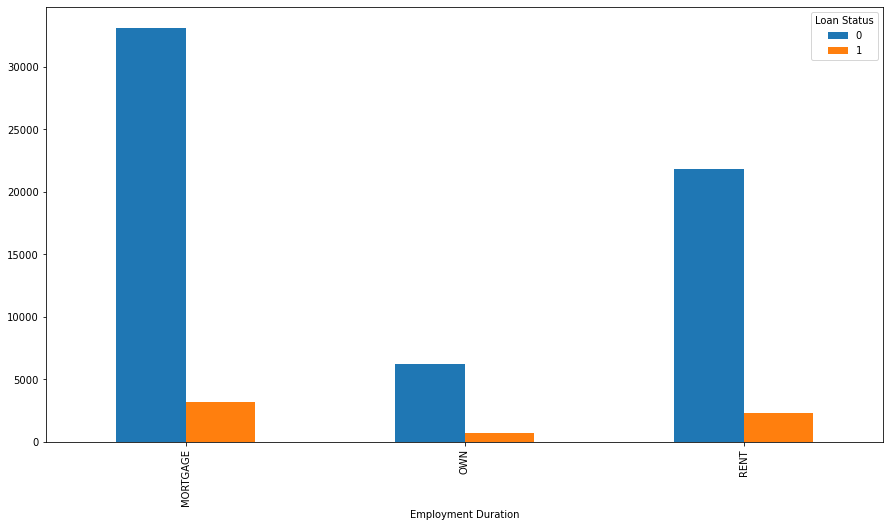

In [24]:
pd.crosstab(df_train['Employment Duration'],df_train['Loan Status']).plot(kind='bar')

<AxesSubplot:xlabel='Verification Status'>

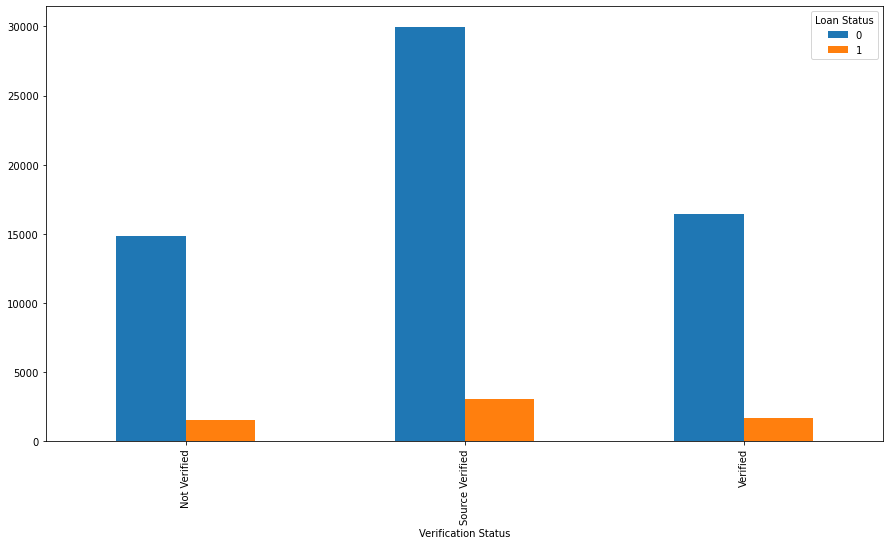

In [25]:
pd.crosstab(df_train['Verification Status'],df_train['Loan Status']).plot(kind='bar')

<AxesSubplot:xlabel='Grade'>

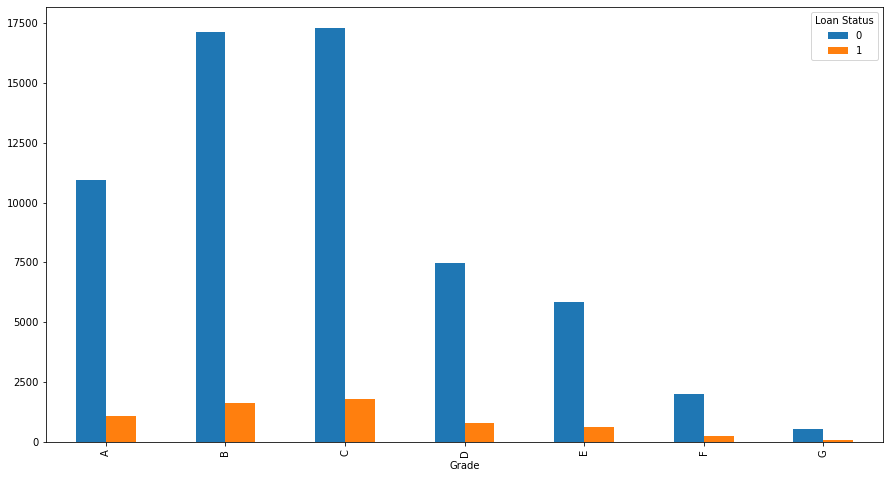

In [26]:
pd.crosstab(df_train['Grade'],df_train['Loan Status']).plot(kind='bar')

<AxesSubplot:>

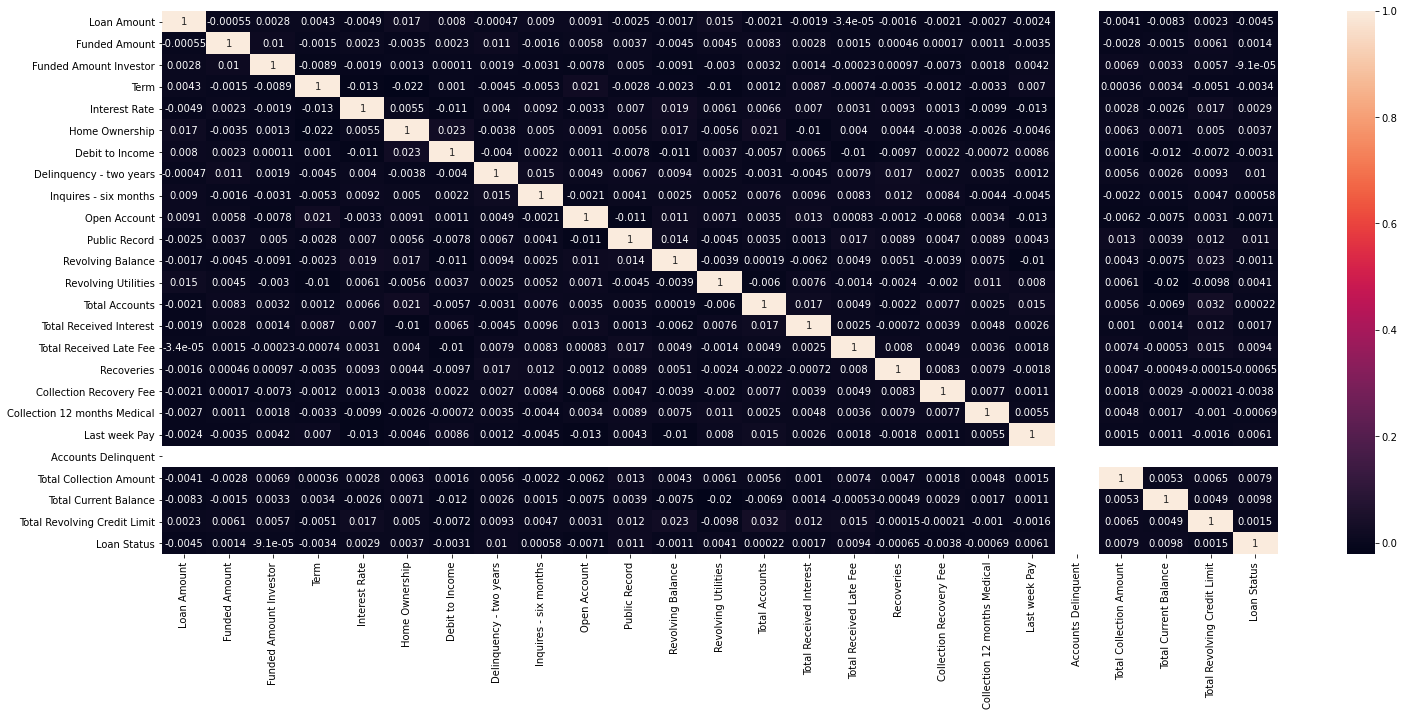

In [27]:
plt.figure(figsize=[25,10])
sns.heatmap(df_train.corr(),annot=True)

#### 4.Feature elemination & feature engineering & feature selection

In [28]:
#df_train['Loan Title'].value_counts()

In [29]:
df_train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.626700,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,39833.921000,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.691050,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.575900,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.825450,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [30]:
def fet_eng(text):
    if text=='Credit card refinancing':
        return text
    else:
        if text=='Debt consolidation' or text=='Debt Consolidation':
            return 'Debt consolidation'
        else:
            return 'Other'

In [31]:
df_train['Loan titles']=df_train['Loan Title'].apply(fet_eng)

In [32]:
#lets remove the old Loan title column.
df_train=df_train.drop(['Loan Title'],axis=1)

In [33]:
df_train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Loan titles
0,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.626700,Not Verified,n,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,Debt consolidation
1,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,39833.921000,Source Verified,n,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,Debt consolidation
2,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.691050,Source Verified,n,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,Debt consolidation
3,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.575900,Source Verified,n,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,Debt consolidation
4,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.825450,Source Verified,n,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,Credit card refinancing


In [34]:
df_dependent=df_train['Loan Status']

In [35]:
df_independent=df_train.drop(['Loan Status'],axis=1)

In [36]:
df_object_tr=df_independent.select_dtypes(include=object)

In [37]:
df_num_tr=df_independent.select_dtypes(include=np.number)

In [38]:
df_object_tr['Employment Duration']=df_object_tr['Employment Duration'].replace({'MORTGAGE':0,'OWN':1,'RENT':2})

In [39]:
df_object_tr['Grade']=df_object_tr['Grade'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})

In [40]:
df_object_tr['Verification Status']=df_object_tr['Verification Status'].replace({'Not Verified':0,'Source Verified':1,'Verified':2})

In [41]:
df_object_tr['Loan titles']=df_train['Loan titles'].replace({'Credit card refinancing':0,'Debt consolidation':1,'Other':2})

In [42]:
df_object_tr['Initial List Status']=df_object_tr['Initial List Status'].replace({'f':0,'w':1})

In [43]:
df_object_tr['Application Type']=df_object_tr['Application Type'].replace({'INDIVIDUAL':0,'JOINT':1})

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
df_object_tr['Batch Enrolled']=le.fit_transform(df_object_tr['Batch Enrolled'])

In [46]:
df_object_tr['Sub Grade']=le.fit_transform(df_object_tr['Sub Grade'])

In [47]:
df_object_tr['Payment Plan']=le.fit_transform(df_object_tr['Payment Plan'])

In [48]:
df_object_tr.head()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Initial List Status,Application Type,Loan titles
0,16,1,13,0,0,0,1,0,1
1,4,2,17,2,1,0,0,0,1
2,11,5,18,0,1,0,1,0,1
3,15,2,12,0,1,0,1,0,1
4,32,2,18,0,1,0,1,0,0


In [49]:
df_num_tr.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,10000,32236,12329.362860,59,11.135007,176346.626700,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,0,31,311301,6619
1,3609,11940,12191.996920,59,12.237563,39833.921000,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,0,53,182610,20885
2,28276,9311,21603.224550,59,12.545884,91506.691050,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,0,34,89801,26155
3,11170,6954,17877.155850,59,16.731201,108286.575900,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,0,40,9189,60214
4,16890,13226,13539.926670,59,15.008300,44234.825450,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579


In [50]:
sc=StandardScaler()

In [51]:
df_num_scale=pd.DataFrame(sc.fit_transform(df_num_tr),columns=df_num_tr.columns)

In [52]:
df_num_scale.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,-0.818483,2.020064,-0.337854,0.248297,-0.191268,2.127642,-0.829943,0.840164,-0.307961,-0.203463,-0.234958,2.111596,0.977986,-1.397725,0.387350,-0.198674,-0.160195,-0.094966,-0.147527,-0.511670,0.000000,-0.155120,1.091309,-0.789041
1,-1.582243,-0.469958,-0.358098,0.248297,0.105229,-0.904035,-0.933158,-0.408459,-0.307961,-0.364105,-0.234958,-0.878926,1.127265,-0.676500,-0.583384,-0.211235,-0.160534,-0.043073,-0.147527,0.873515,0.000000,-0.125565,0.165689,-0.106997
2,1.365603,-0.792498,1.028905,0.248297,0.188142,0.243515,0.572470,-0.408459,-0.307961,-0.042821,-0.234958,-0.747355,-2.254570,0.164928,-0.542629,3.362623,-0.155103,-0.030106,-0.147527,-0.119201,0.000000,-0.151090,-0.501847,0.144957
3,-0.678661,-1.081668,0.479766,0.248297,1.313651,0.616163,-0.621824,0.840164,-0.307961,-1.167316,-0.234958,0.780958,0.646804,-0.796704,-0.801484,-0.209719,-0.166892,-0.107503,-0.147527,-0.742534,0.000000,-0.143030,-1.081655,1.773285
4,0.004911,-0.312185,-0.159444,0.248297,0.850331,-0.806299,-0.720484,0.840164,6.030678,-0.203463,2.650186,-0.785512,1.435774,0.405337,-0.873015,3.463301,3.459510,-0.216682,-0.147527,-1.227349,0.000000,0.380899,-0.241275,-0.026008


In [53]:
df_concat=pd.concat([df_num_scale,df_object_tr],axis=1)

In [54]:
df_concat.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Initial List Status,Application Type,Loan titles
0,-0.818483,2.020064,-0.337854,0.248297,-0.191268,2.127642,-0.829943,0.840164,-0.307961,-0.203463,-0.234958,2.111596,0.977986,-1.397725,0.387350,-0.198674,-0.160195,-0.094966,-0.147527,-0.511670,0.000000,-0.155120,1.091309,-0.789041,16,1,13,0,0,0,1,0,1
1,-1.582243,-0.469958,-0.358098,0.248297,0.105229,-0.904035,-0.933158,-0.408459,-0.307961,-0.364105,-0.234958,-0.878926,1.127265,-0.676500,-0.583384,-0.211235,-0.160534,-0.043073,-0.147527,0.873515,0.000000,-0.125565,0.165689,-0.106997,4,2,17,2,1,0,0,0,1
2,1.365603,-0.792498,1.028905,0.248297,0.188142,0.243515,0.572470,-0.408459,-0.307961,-0.042821,-0.234958,-0.747355,-2.254570,0.164928,-0.542629,3.362623,-0.155103,-0.030106,-0.147527,-0.119201,0.000000,-0.151090,-0.501847,0.144957,11,5,18,0,1,0,1,0,1
3,-0.678661,-1.081668,0.479766,0.248297,1.313651,0.616163,-0.621824,0.840164,-0.307961,-1.167316,-0.234958,0.780958,0.646804,-0.796704,-0.801484,-0.209719,-0.166892,-0.107503,-0.147527,-0.742534,0.000000,-0.143030,-1.081655,1.773285,15,2,12,0,1,0,1,0,1
4,0.004911,-0.312185,-0.159444,0.248297,0.850331,-0.806299,-0.720484,0.840164,6.030678,-0.203463,2.650186,-0.785512,1.435774,0.405337,-0.873015,3.463301,3.459510,-0.216682,-0.147527,-1.227349,0.000000,0.380899,-0.241275,-0.026008,32,2,18,0,1,0,1,0,0


In [55]:
#split the data
X=df_concat
y=df_dependent

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [57]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [59]:
print(model.feature_importances_)

[0.04215981 0.04108675 0.04170997 0.01951009 0.04151161 0.04155838
 0.04132819 0.02359447 0.01467254 0.04029049 0.01052245 0.04068917
 0.04105749 0.04134722 0.04162853 0.04092607 0.04102077 0.04068514
 0.00452691 0.04134428 0.         0.04092125 0.04171566 0.04056117
 0.04022992 0.0325163  0.04090628 0.01646357 0.02477644 0.
 0.00662577 0.00073267 0.02338063]


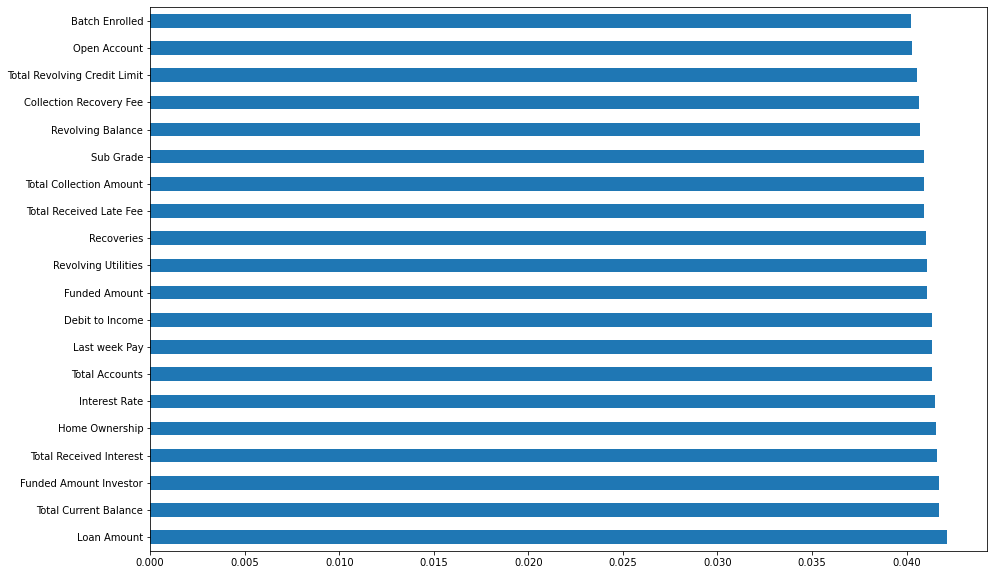

In [60]:
plt.figure(figsize = [15,10])
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [61]:
ranked_features.nlargest(40, keep='all')

Loan Amount                    0.042160
Total Current Balance          0.041716
Funded Amount Investor         0.041710
Total Received Interest        0.041629
Home Ownership                 0.041558
Interest Rate                  0.041512
Total Accounts                 0.041347
Last week Pay                  0.041344
Debit to Income                0.041328
Funded Amount                  0.041087
Revolving Utilities            0.041057
Recoveries                     0.041021
Total Received Late Fee        0.040926
Total Collection Amount        0.040921
Sub Grade                      0.040906
Revolving Balance              0.040689
Collection Recovery Fee        0.040685
Total Revolving Credit Limit   0.040561
Open Account                   0.040290
Batch Enrolled                 0.040230
Grade                          0.032516
Verification Status            0.024776
Delinquency - two years        0.023594
Loan titles                    0.023381
Term                           0.019510


In [62]:
X_train.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit',
       'Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Payment Plan', 'Initial List Status',
       'Application Type', 'Loan titles'],
      dtype='object')

In [63]:
X_train=X_train.drop(['Loan titles','Collection 12 months Medical','Payment Plan','Grade','Verification Status',
                     'Delinquency - two years','Term','Inquires - six months','Public Record','Initial List Status','Application Type',
                     'Accounts Delinquent','Employment Duration','Open Account','Batch Enrolled'],axis=1)

In [64]:
X_test=X_test.drop(['Loan titles','Collection 12 months Medical','Payment Plan','Grade','Verification Status',
                     'Delinquency - two years','Term','Inquires - six months','Public Record','Initial List Status','Application Type',
                     'Accounts Delinquent','Employment Duration','Open Account','Batch Enrolled'],axis=1)

In [65]:
X_train.shape

(47224, 18)

In [66]:
#Base model

In [67]:
lr=LogisticRegression()

In [68]:
model=lr.fit(X_train,y_train)

In [69]:
y_pred_ts=model.predict(X_test)
print(accuracy_score(y_test,y_pred_ts))

0.9098275606502297


In [70]:
y_pred_tr=model.predict(X_train)
print(accuracy_score(y_train,y_pred_tr))

0.9064882263255971


In [71]:
print(confusion_matrix(y_test,y_pred_ts))
print(accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

[[18414     0]
 [ 1825     0]]
0.9098275606502297
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18414
           1       0.00      0.00      0.00      1825

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.83      0.91      0.87     20239



#### SMOTETomek

In [72]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [73]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 42808, 1: 4416})
Counter({0: 42794, 1: 32092})


In [74]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [75]:
y_pred_rc=rc.predict(X_test)
print(confusion_matrix(y_test,y_pred_rc))
print(accuracy_score(y_test,y_pred_rc))
print(classification_report(y_test,y_pred_rc))

[[17122  1292]
 [ 1679   146]]
0.8532042096941549
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     18414
           1       0.10      0.08      0.09      1825

    accuracy                           0.85     20239
   macro avg       0.51      0.50      0.50     20239
weighted avg       0.84      0.85      0.85     20239



In [76]:
#logistic regression
lr.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [77]:
y_pred_lr=lr.predict(X_test)
print(confusion_matrix(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[18398    16]
 [ 1824     1]]
0.9090864173131084
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18414
           1       0.06      0.00      0.00      1825

    accuracy                           0.91     20239
   macro avg       0.48      0.50      0.48     20239
weighted avg       0.83      0.91      0.87     20239



In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
#Adaboost
ada_bost = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_bost.fit(X_train_ns, y_train_ns)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [80]:
y_pred_ad=ada_bost.predict(X_test)
print(confusion_matrix(y_test,y_pred_ad))
print(accuracy_score(y_test,y_pred_ad))
print(classification_report(y_test,y_pred_ad))

[[13878  4536]
 [ 1302   523]]
0.7115470131923514
              precision    recall  f1-score   support

           0       0.91      0.75      0.83     18414
           1       0.10      0.29      0.15      1825

    accuracy                           0.71     20239
   macro avg       0.51      0.52      0.49     20239
weighted avg       0.84      0.71      0.77     20239



In [81]:
#gb
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train_ns, y_train_ns)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [82]:
y_pred_gb=gboost_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_gb))
print(accuracy_score(y_test,y_pred_gb))
print(classification_report(y_test,y_pred_gb))

[[18382    32]
 [ 1818     7]]
0.9085923217550275
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18414
           1       0.18      0.00      0.01      1825

    accuracy                           0.91     20239
   macro avg       0.54      0.50      0.48     20239
weighted avg       0.84      0.91      0.87     20239



In [83]:
#xgb
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train_ns, y_train_ns)

[15:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
y_pred_xg=xgb_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_xg))
print(accuracy_score(y_test,y_pred_xg))
print(classification_report(y_test,y_pred_xg))

[[18343    71]
 [ 1817     8]]
0.9067147586343198
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18414
           1       0.10      0.00      0.01      1825

    accuracy                           0.91     20239
   macro avg       0.51      0.50      0.48     20239
weighted avg       0.84      0.91      0.87     20239



#### Compared the result of accuracy's with different models we select logistic regression model with 91 %

#### Test Data

In [85]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.821900,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,nan
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.013440,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,nan
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.932680,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,nan
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.989650,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,nan
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.854230,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,nan


In [86]:
df_test.shape

(28913, 35)

In [87]:
df_test=df_test.drop(['Loan Title','Collection 12 months Medical','Payment Plan','Grade','Verification Status',
                     'Delinquency - two years','Term','Inquires - six months','Public Record','Initial List Status','Application Type',
                     'Accounts Delinquent','Employment Duration','Open Account','Batch Enrolled','ID','Loan Status'],axis=1)

In [88]:
df_test.shape

(28913, 18)

In [89]:
df_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Sub Grade,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,17120,10365,16025.082690,12.163926,D1,76468.821900,16.749219,3576,67.278287,5,4469.449851,0.088031,8.425776,0.731797,135,24,475442,4364
1,7133,11650,12615.795600,6.564296,E3,38079.013440,18.157975,1932,71.313157,21,993.907530,0.041237,6.157008,0.992918,56,1,72412,2573
2,25291,25825,11621.280830,14.729900,C3,51275.932680,15.190011,598,50.883065,23,729.113379,0.021745,5.705077,0.281580,3,26,284825,19676
3,30781,9664,15375.823510,10.523767,A2,68867.989650,21.292550,5222,82.449083,28,715.867091,0.092398,2.469688,0.959162,21,32,40842,7226
4,8878,9419,7176.647582,9.997013,B3,91556.854230,4.812117,553,49.075855,9,248.572854,0.010354,2.127835,0.402315,104,33,90825,26145


In [90]:
df_test_object=df_test.select_dtypes(include=object)

In [92]:
df_test_object['Sub Grade']=le.fit_transform(df_test_object['Sub Grade'])

In [93]:
df_test_object.head()

,Sub Grade
0,15
1,22
2,12
3,1
4,7


In [94]:
df_test_num=df_test.select_dtypes(include=np.number)

In [95]:
df_test_num.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,17120,10365,16025.082690,12.163926,76468.821900,16.749219,3576,67.278287,5,4469.449851,0.088031,8.425776,0.731797,135,24,475442,4364
1,7133,11650,12615.795600,6.564296,38079.013440,18.157975,1932,71.313157,21,993.907530,0.041237,6.157008,0.992918,56,1,72412,2573
2,25291,25825,11621.280830,14.729900,51275.932680,15.190011,598,50.883065,23,729.113379,0.021745,5.705077,0.281580,3,26,284825,19676
3,30781,9664,15375.823510,10.523767,68867.989650,21.292550,5222,82.449083,28,715.867091,0.092398,2.469688,0.959162,21,32,40842,7226
4,8878,9419,7176.647582,9.997013,91556.854230,4.812117,553,49.075855,9,248.572854,0.010354,2.127835,0.402315,104,33,90825,26145


In [96]:
df_test_sc=pd.DataFrame(sc.fit_transform(df_test_num),columns=df_test_num.columns)

In [97]:
df_test_sc.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,0.085655,-0.638520,0.177524,-0.006047,-0.077711,-0.624899,-0.581958,0.588484,-1.595675,1.209675,-0.175202,-0.125427,-0.043688,1.647138,-0.148902,2.316883,-0.926660
1,-1.109140,-0.482380,-0.294006,-1.437741,-0.926470,-0.462177,-0.732354,0.765442,0.062326,-0.437965,-0.185023,-0.132170,-0.026441,-0.211976,-0.174131,-0.579935,-1.007031
2,1.063193,1.240011,-0.431554,0.650013,-0.634700,-0.804998,-0.854391,-0.130563,0.269577,-0.563496,-0.189113,-0.133514,-0.073426,-1.459230,-0.146708,0.946804,-0.239534
3,1.719990,-0.723697,0.087727,-0.425397,-0.245758,-0.100112,-0.431378,1.253832,0.787702,-0.569775,-0.174286,-0.143130,-0.028670,-1.035634,-0.140127,-0.806848,-0.798227
4,-0.900377,-0.753467,-1.046280,-0.560076,0.255869,-2.003718,-0.858507,-0.209822,-1.181175,-0.791304,-0.191504,-0.144146,-0.065451,0.917612,-0.139030,-0.447590,0.050762


In [99]:
df_test_con=pd.concat([df_test_sc,df_test_object],axis=1)

In [100]:
df_test_con.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Sub Grade
0,0.085655,-0.638520,0.177524,-0.006047,-0.077711,-0.624899,-0.581958,0.588484,-1.595675,1.209675,-0.175202,-0.125427,-0.043688,1.647138,-0.148902,2.316883,-0.926660,15
1,-1.109140,-0.482380,-0.294006,-1.437741,-0.926470,-0.462177,-0.732354,0.765442,0.062326,-0.437965,-0.185023,-0.132170,-0.026441,-0.211976,-0.174131,-0.579935,-1.007031,22
2,1.063193,1.240011,-0.431554,0.650013,-0.634700,-0.804998,-0.854391,-0.130563,0.269577,-0.563496,-0.189113,-0.133514,-0.073426,-1.459230,-0.146708,0.946804,-0.239534,12
3,1.719990,-0.723697,0.087727,-0.425397,-0.245758,-0.100112,-0.431378,1.253832,0.787702,-0.569775,-0.174286,-0.143130,-0.028670,-1.035634,-0.140127,-0.806848,-0.798227,1
4,-0.900377,-0.753467,-1.046280,-0.560076,0.255869,-2.003718,-0.858507,-0.209822,-1.181175,-0.791304,-0.191504,-0.144146,-0.065451,0.917612,-0.139030,-0.447590,0.050762,7


In [101]:
pred=lr.predict(df_test_con)

In [102]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
sample=pd.read_csv('submission.csv')

In [105]:
sample.head()

,Loan Status
0,0
1,0
2,0
3,0
4,0


In [107]:
df=pd.DataFrame({"Loan_Status":pred})
df.head()

,Loan_Status
0,0
1,0
2,0
3,0
4,0


In [108]:
df.to_csv('pred.csv',index=False)

In [109]:
df.head()

,Loan_Status
0,0
1,0
2,0
3,0
4,0
